Lab1-project - Data Science for Business, Università degli Studi dell'Insubria.

Students:

-Destro Gabriele (matr.727053) --Tagliareni Andrea Angelo (matr.727170) --D'Elia Giulio Francesco (matr.730849)

Il progetto si focalizza sull'analisi e l'osservazione dei rapporti di lavoro attivati e cessati durante gli anni nella Regione Lombardia. Step 1. Raccolta dati dal sito ufficiale della Regione Lombardia. Step.2 Considerazioni sui dataset dopo import. Step.3 Pulizia dei dataset e correzioni. Step.4 Considerazioni sull'occupazione maschile e femminile. Step.5 Analisi annuale tenendo in considerazione di lavori cessati e attivati in ogni settore. Step.6 prearazione dei dati per realizzazione modello di predittività che consideri andamento del mercato lavorativo, in modo da fornire le posizioni più appetibili per i lavoratori sulla base dei dati forniti e alla richiesta di mercato.

Step 1. Raccolta dati dal sito ufficiale della Regione Lombardia.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from os.path import exists
import requests


In [2]:
if not exists('Rapporti_di_lavoro_attivati.csv'):
    file = requests.get("https://dati.lombardia.it/api/views/qbau-cyuc/rows.csv?accessType=DOWNLOAD", allow_redirects=True)
    open('Rapporti_di_lavoro_attivati.csv', 'wb').write(file.content)

if not exists('Rapporti_di_lavoro_cessati.csv'):
    file = requests.get("https://dati.lombardia.it/api/views/nwz3-p6vm/rows.csv?accessType=DOWNLOAD", allow_redirects=True)
    open('Rapporti_di_lavoro_cessati.csv', 'wb').write(file.content) 

In [3]:
attivati = pd.read_csv('Rapporti_di_lavoro_attivati.csv')
cessati = pd.read_csv('Rapporti_di_lavoro_cessati.csv')

Partiamo dal considerare i contratti di lavoro attivati:

In [4]:
attivati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9579794 entries, 0 to 9579793
Data columns (total 9 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   DATA                       object
 1   GENERE                     object
 2   ETA                        int64 
 3   SETTOREECONOMICODETTAGLIO  object
 4   TITOLOSTUDIO               object
 5   CONTRATTO                  object
 6   MODALITALAVORO             object
 7   PROVINCIAIMPRESA           object
 8   ITALIANO                   object
dtypes: int64(1), object(8)
memory usage: 657.8+ MB


In [5]:
attivati.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,09/05/2020,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO,BERGAMO,UCRAINA
1,12/07/2019,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
2,05/06/2013,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/03/2010,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO,BERGAMO,ITALIA
4,06/04/2021,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO,BERGAMO,ITALIA


In [6]:
attivati.describe(include = 'all')

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
count,9579794,9579794,9.579794e+06,9576906,9579214,9579794,9139015,9579794,9579794
unique,2001,2,NaN,1224,12,54,5,12,199
top,09/10/2010,M,NaN,Alberghi,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MILANO,ITALIA
freq,19895,5108146,NaN,467057,2721891,4820133,5337940,4765803,7223698
mean,NaN,NaN,3.530174e+01,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.178234e+01,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,3.400000e+01,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.400000e+01,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
attivati['DATA'] = pd.to_datetime(attivati['DATA'], format="%d/%m/%Y", errors='coerce')
attivati.groupby("DATA")["DATA"].count()

DATA
1973-01-02       1
1974-06-11       1
1976-10-01       1
1978-05-01       1
1978-07-10       1
              ... 
2021-12-06    1097
2021-12-07    6873
2021-12-08    4962
2021-12-09     601
2201-09-06       1
Name: DATA, Length: 2001, dtype: int64

Studiamo quanti contratti sono stati attivati per anno:

In [8]:
attivati.DATA.value_counts()

2010-10-09    19895
2018-12-01    16789
2011-07-10    16349
2011-07-11    15719
2021-10-09    15392
              ...  
2007-04-09        1
2008-01-03        1
1974-06-11        1
1997-02-12        1
2008-06-01        1
Name: DATA, Length: 2001, dtype: int64

Considerazioni: Vi sono errori nel dataset. Per la nostra indagine, che si focalizza sulla predittività della dmanda di mercato e dei settori più proficui non abbiamo bisogno delle colonne della nazionalità, della provincia, e del titolo di studio.
Correggiamo quindi la colonna nel dataset rinominandola da italiano a nazionalità e consideriamo le età pensionabili che vanno dai 18 anni ai 67 per comodità di indagine.
Notiamo che vi sono dte che vanno molto a ritroso; per la nostra indagine consideriamo le date che partono dal 2009 ( anno dello sviluppo dei social e del cambiamento delle modalità lavorative verso un approccio più moderno) fino al 2021, dal momento che il 2022 non è ancora finito.

In [9]:
#null count e pulizia
attivati.isnull().sum()

DATA                              0
GENERE                            0
ETA                               0
SETTOREECONOMICODETTAGLIO      2888
TITOLOSTUDIO                    580
CONTRATTO                         0
MODALITALAVORO               440779
PROVINCIAIMPRESA                  0
ITALIANO                          0
dtype: int64

In [10]:
# drop null
attivati.dropna(axis=0, how='any', inplace=True)
attivati.isnull().sum()

DATA                         0
GENERE                       0
ETA                          0
SETTOREECONOMICODETTAGLIO    0
TITOLOSTUDIO                 0
CONTRATTO                    0
MODALITALAVORO               0
PROVINCIAIMPRESA             0
ITALIANO                     0
dtype: int64

In [11]:
attivati.drop('ITALIANO', inplace=True, axis=1)
attivati.drop("PROVINCIAIMPRESA", axis=1, inplace=True)
attivati.drop(attivati[(attivati.ETA < 18) | (attivati.ETA > 67)].index, inplace=True)
#range di interesse per un contratto lavorativo che possa essere rilevante nella media legale

In [12]:
attivati.drop(attivati[(attivati.SETTOREECONOMICODETTAGLIO == 'NON DEFINITO')].index, inplace = True) #ci serve sapere il settore economico

In [13]:
attivati.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO
0,2020-05-09,F,60,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO DOMESTICO,TEMPO PIENO
1,2019-07-12,M,43,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO
2,2013-06-05,F,20,Fabbricazione di altre apparecchiature elettri...,LICENZA MEDIA,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO
3,2010-03-12,F,28,Alberghi,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO INTERMITTENTE A TEMPO DETERMINATO,NON DEFINITO
4,2021-04-06,F,49,Rifugi di montagna,LICENZA MEDIA,LAVORO INTERMITTENTE,NON DEFINITO


In [14]:
attivatiCl = attivati[(attivati['DATA'].dt.year>2008 ) & (attivati['DATA'].dt.year<2022)]
attivatiCl.groupby("DATA")["DATA"].count()

DATA
2009-01-01      39
2009-01-02      87
2009-01-03      18
2009-01-04     153
2009-01-05      17
              ... 
2021-12-05    7704
2021-12-06    1080
2021-12-07    6718
2021-12-08    4912
2021-12-09     595
Name: DATA, Length: 1842, dtype: int64

In [15]:
attivatiCl['DATA'] = attivatiCl['DATA'].dt.year
attivatiCl.groupby("DATA")["DATA"].count()

C:\Users\andre\AppData\Local\Temp/ipykernel_8840/2859084188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attivatiCl['DATA'] = attivatiCl['DATA'].dt.year


DATA
2009    343633
2010    664417
2011    704130
2012    641593
2013    654557
2014    682990
2015    751204
2016    754276
2017    837877
2018    889201
2019    863839
2020    632806
2021    614597
Name: DATA, dtype: int64

Text(0, 0.5, 'NUMERO ATTIVAZIONI')

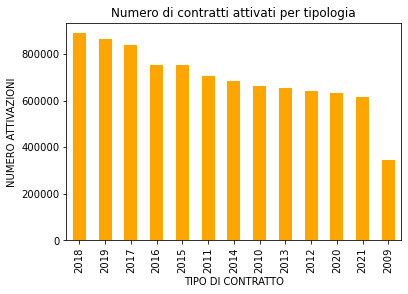

In [16]:
attivatiCl.DATA.value_counts()
plt.ticklabel_format(style='plain')
value_count_modalita=attivatiCl.DATA.value_counts()
abscissa_axis=value_count_modalita.index
ordinate_axis=value_count_modalita.values
ax=value_count_modalita.plot.bar(x=abscissa_axis,y=ordinate_axis,color='orange')
plt.title('Numero di contratti attivati per tipologia')
plt.xlabel('TIPO DI CONTRATTO')
plt.ylabel('NUMERO ATTIVAZIONI')

Inseriamo un boxplot, il quale è la rappresentazione di un grafico statistico che si utilizza per variabili quantitative. É molto utile per capire se la distribuzione è simmetrica oppure asimmetrica e per confrontare la forma di più distribuzioni. Ma soprattutto permette di identificare in modo rapido e preciso valori anomali e outliers.

<AxesSubplot:xlabel='ETA'>

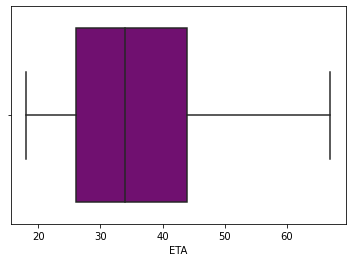

In [17]:
#Boxplot età -contratti di lavoro attivati-
sns.boxplot(x=attivatiCl.ETA, color='purple')

In [18]:
attivatiCl.loc[:, ['SETTOREECONOMICODETTAGLIO']].value_counts()

SETTOREECONOMICODETTAGLIO                                                                                                                                                      
Alberghi                                                                                                                                                                           458357
Ristorazione con somministrazione                                                                                                                                                  432653
Attività di produzione cinematografica, di video e di programmi televisivi                                                                                                         367815
Attività di famiglie e convivenze come datori di lavoro per personale domestico                                                                                                    343806
Altri servizi di supporto alle imprese nca                                      

Text(0, 0.5, 'SETTORE')

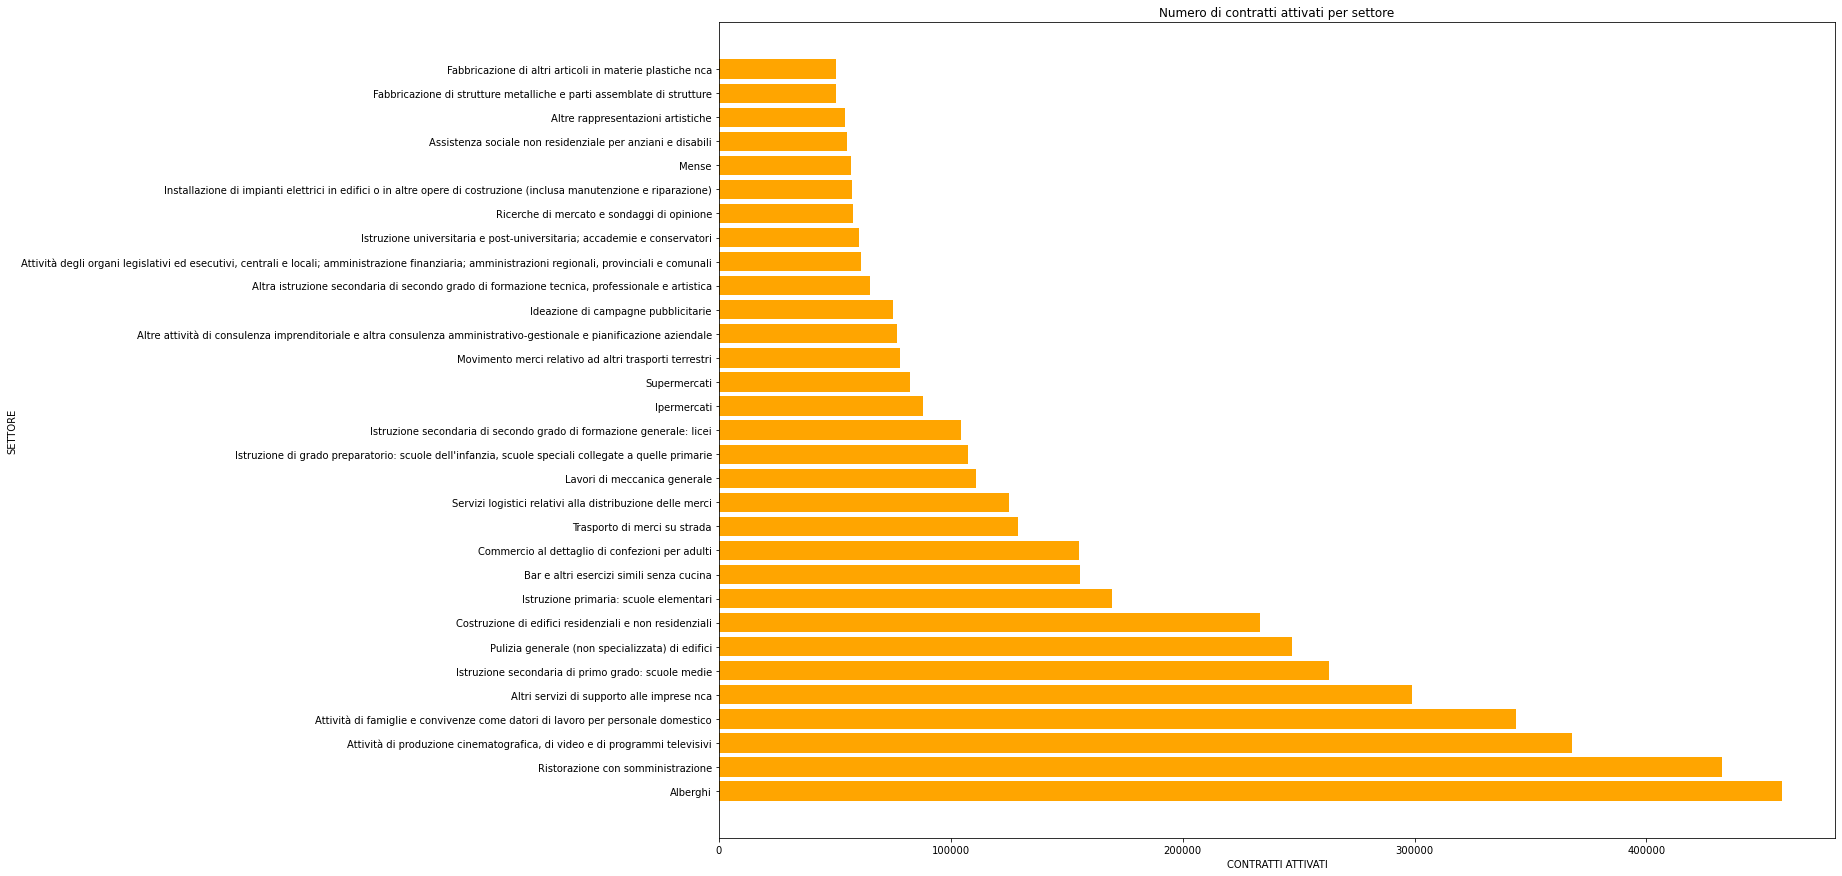

In [19]:
#plt.ticklabel_format(style='plain')
counts=attivatiCl.loc[:, ['SETTOREECONOMICODETTAGLIO']].value_counts()  
counts=counts[counts.values>50000]
pltfigsize=(20,15)
plt.figure(figsize=pltfigsize) 
plt.ticklabel_format(style='plain') #Importante lasciare qui questo comando 
plt.barh(y=[i[0] for i in counts.index], width=counts.values, color='orange')
plt.title('Numero di contratti attivati per settore')
plt.xlabel('CONTRATTI ATTIVATI')
plt.ylabel('SETTORE')

In [20]:
head=attivatiCl.SETTOREECONOMICODETTAGLIO.value_counts().head(10)

Tipologie di contratti di lavoro attivati:

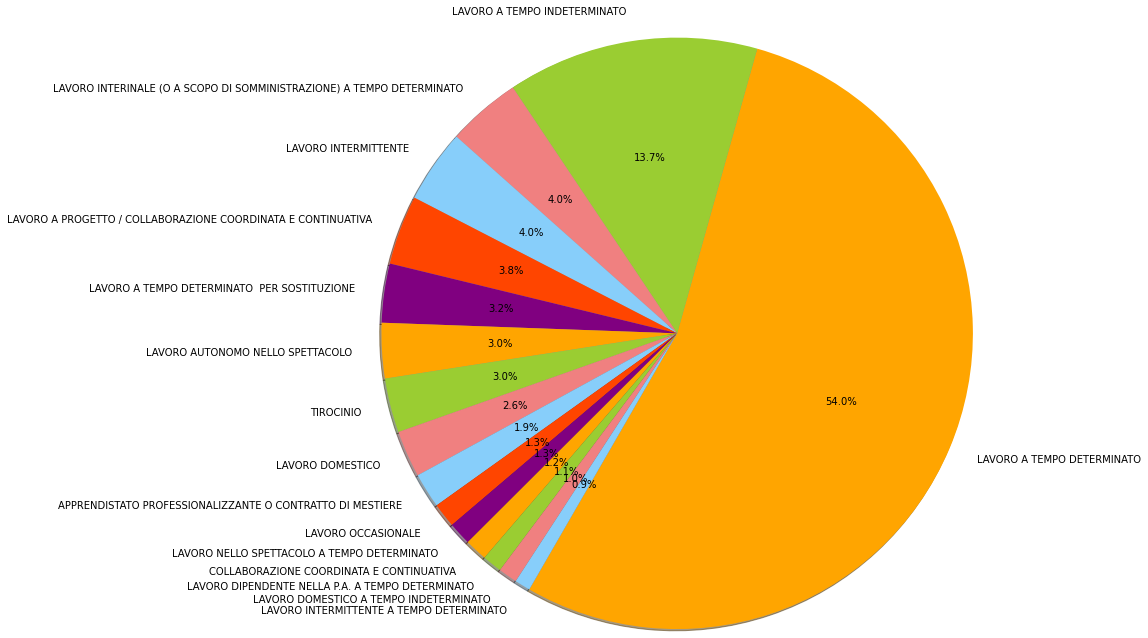

In [21]:
counts=attivatiCl.loc[:, ['CONTRATTO']].value_counts()
counts=counts[counts.values>75000]
cols = ['orange', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orangered', 'purple']
plt.pie(counts,labels=[i[0] for i in counts.index],autopct='%1.1f%%',colors=cols,startangle=240,shadow=True,radius=3.4)
plt.show()

Consideriamo i lavori cessati

In [22]:
cessati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190266 entries, 0 to 2190265
Data columns (total 9 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   DATA                       object 
 1   GENERE                     object 
 2   ETA                        float64
 3   SETTOREECONOMICODETTAGLIO  object 
 4   TITOLOSTUDIO               object 
 5   CONTRATTO                  object 
 6   MODALITALAVORO             object 
 7   PROVINCIAIMPRESA           object 
 8   ITALIANO                   object 
dtypes: float64(1), object(8)
memory usage: 150.4+ MB


In [23]:
cessati.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
0,02/04/2019,M,20.0,Lavori di meccanica generale,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
1,08/06/2018,F,28.0,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
2,02/02/2016,F,20.0,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA
3,12/01/2015,M,59.0,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA
4,09/08/2017,M,61.0,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA


In [24]:
cessati.DATA.value_counts()

01/03/2011    8063
01/04/2010    6979
01/02/2012    6492
01/02/2013    5824
01/02/2014    5218
              ... 
07/12/2005       1
07/04/2003       1
05/02/1995       1
07/04/2006       1
}                1
Name: DATA, Length: 2261, dtype: int64

In [25]:
cessati.describe(include = 'all')

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO
count,2190266,2190262,2.190262e+06,2189683,2189985,2190262,2190261,2190261,2190261
unique,2261,2,NaN,1201,12,55,5,12,190
top,01/03/2011,M,NaN,Attività di famiglie e convivenze come datori ...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO INDETERMINATO,TEMPO PIENO,MILANO,ITALIA
freq,8063,1237795,NaN,163322,715535,1119625,1291821,1002982,1516572
mean,NaN,NaN,3.808774e+01,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.260001e+01,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.800000e+01,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,3.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
cessati['DATA'] = pd.to_datetime(attivati['DATA'], format="%d/%m/%Y", errors='coerce')
cessati.groupby("DATA")["DATA"].count()

DATA
1976-10-01       1
1978-07-10       1
1980-01-08       1
1988-12-07       1
1996-12-02       1
              ... 
2021-12-05    1736
2021-12-06     238
2021-12-07    1558
2021-12-08    1110
2021-12-09     157
Name: DATA, Length: 1953, dtype: int64

In [27]:
cessati.DATA.value_counts()

2010-10-09    3944
2018-12-01    3772
2015-09-01    3389
2021-10-09    3379
2019-03-10    3320
              ... 
2008-08-10       1
2008-01-06       1
2008-11-12       1
2009-01-03       1
2009-11-04       1
Name: DATA, Length: 1953, dtype: int64

In [28]:
cessati.isnull().sum()

DATA                         123665
GENERE                            4
ETA                               4
SETTOREECONOMICODETTAGLIO       583
TITOLOSTUDIO                    281
CONTRATTO                         4
MODALITALAVORO                    5
PROVINCIAIMPRESA                  5
ITALIANO                          5
dtype: int64

In [29]:
# drop null
cessati.dropna(axis=0, how='any', inplace=True)
cessati.isnull().sum()

DATA                         0
GENERE                       0
ETA                          0
SETTOREECONOMICODETTAGLIO    0
TITOLOSTUDIO                 0
CONTRATTO                    0
MODALITALAVORO               0
PROVINCIAIMPRESA             0
ITALIANO                     0
dtype: int64

In [30]:
cessati.drop('ITALIANO', inplace=True, axis=1)
cessati.drop("PROVINCIAIMPRESA", axis=1, inplace=True)
cessati.drop(cessati[(cessati.ETA < 18) | (cessati.ETA > 67)].index, inplace=True)
#range di interesse per un contratto lavorativo che possa essere rilevante nella media

In [31]:
cessati.drop(cessati[(cessati.SETTOREECONOMICODETTAGLIO == 'NON DEFINITO')].index, inplace = True)

In [32]:
cessati.head()

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO
0,2020-05-09,M,20.0,Lavori di meccanica generale,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO
1,2019-07-12,F,28.0,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO
2,2013-06-05,F,20.0,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO
3,2010-03-12,M,59.0,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO
4,2021-04-06,M,61.0,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO


In [33]:
cessatiCl = cessati[(cessati['DATA'].dt.year>2008 ) & (cessati['DATA'].dt.year<2022)]
cessatiCl.groupby("DATA")["DATA"].count()

DATA
2009-01-01       9
2009-01-02      18
2009-01-03       1
2009-01-04      38
2009-01-05       4
              ... 
2021-12-05    1719
2021-12-06     237
2021-12-07    1540
2021-12-08    1098
2021-12-09     156
Name: DATA, Length: 1839, dtype: int64

In [34]:
cessatiCl['DATA'] = cessatiCl['DATA'].dt.year
cessatiCl.groupby("DATA")["DATA"].count()

C:\Users\andre\AppData\Local\Temp/ipykernel_8840/2587806957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cessatiCl['DATA'] = cessatiCl['DATA'].dt.year


DATA
2009     77830
2010    150215
2011    159635
2012    145351
2013    147973
2014    154684
2015    170444
2016    170326
2017    188923
2018    201470
2019    194846
2020    143397
2021    138770
Name: DATA, dtype: int64

Text(0, 0.5, 'NUMERO CONTRATTI CESSATI')

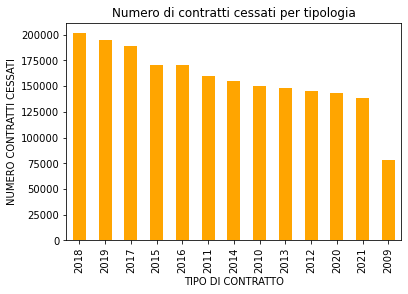

In [35]:
cessatiCl.DATA.value_counts()
plt.ticklabel_format(style='plain')
value_count_modalita=cessatiCl.DATA.value_counts()
abscissa_axis=value_count_modalita.index
ordinate_axis=value_count_modalita.values
ax=value_count_modalita.plot.bar(x=abscissa_axis,y=ordinate_axis,color='orange')
plt.title('Numero di contratti cessati per tipologia')
plt.xlabel('TIPO DI CONTRATTO')
plt.ylabel('NUMERO CONTRATTI CESSATI')

<AxesSubplot:xlabel='ETA'>

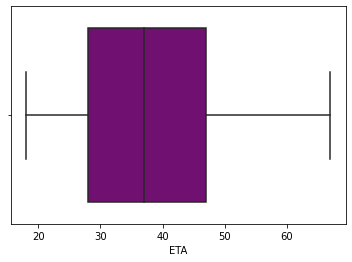

In [36]:
#Boxplot CESSATI età
sns.boxplot(x=cessatiCl.ETA, color='purple')

In [37]:
cessatiCl.loc[:, ['SETTOREECONOMICODETTAGLIO']].value_counts()

SETTOREECONOMICODETTAGLIO                                                                                                                                                                                  
Attività di famiglie e convivenze come datori di lavoro per personale domestico                                                                                                                                151957
Ristorazione con somministrazione                                                                                                                                                                              116242
Costruzione di edifici residenziali e non residenziali                                                                                                                                                         101586
Pulizia generale (non specializzata) di edifici                                                                                                           

--------------------------------------------------------

Numero di contratti cessati per settore

Text(0, 0.5, 'SETTORE')

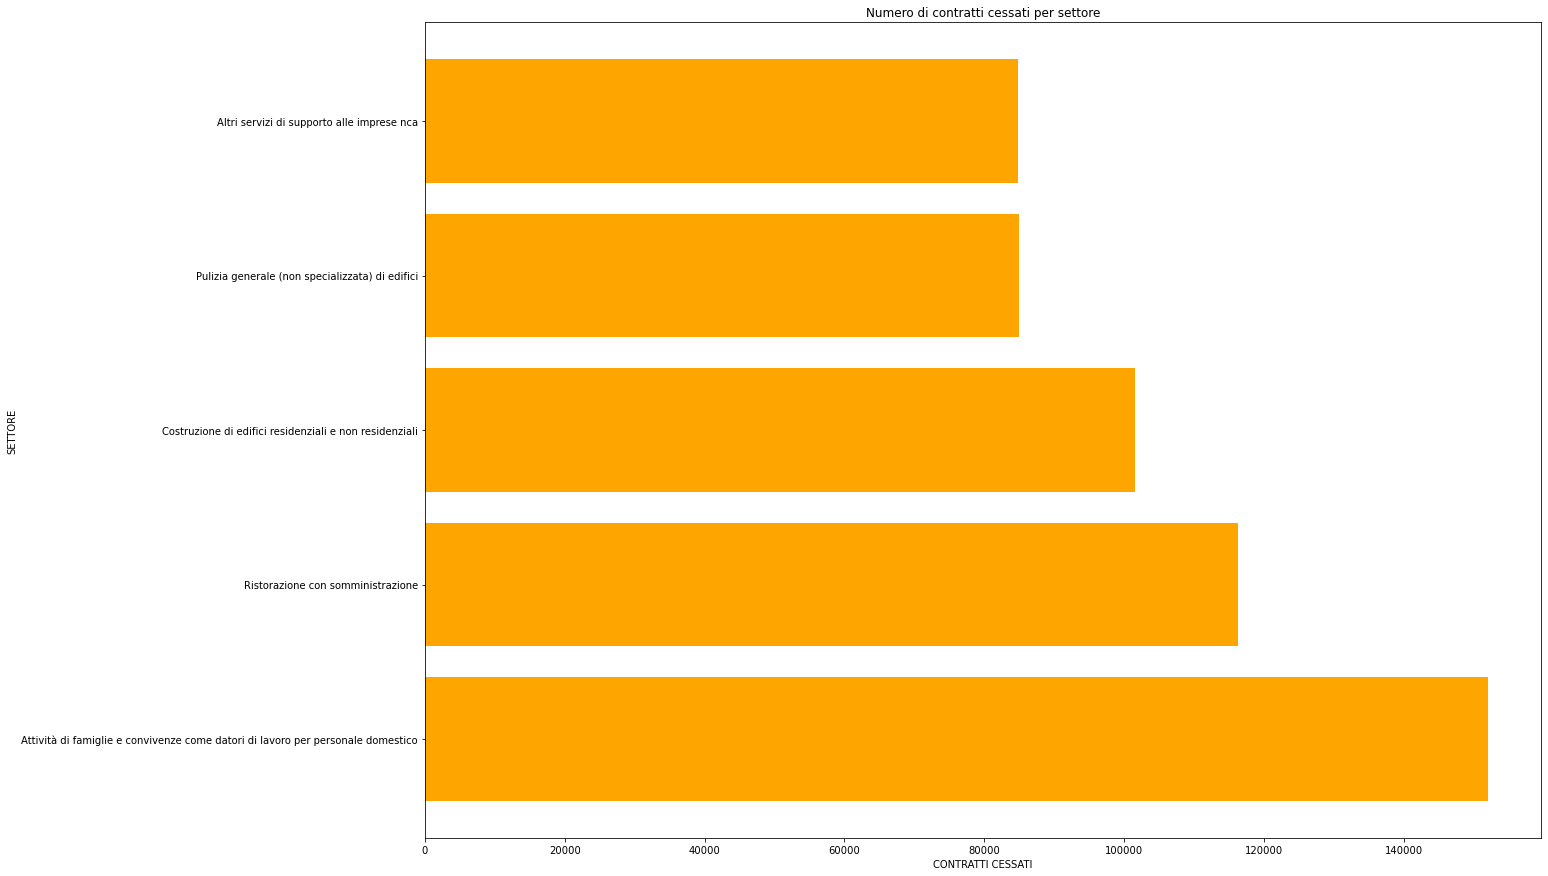

In [38]:
#plt.ticklabel_format(style='plain')
counts=cessatiCl.loc[:, ['SETTOREECONOMICODETTAGLIO']].value_counts()  
counts=counts[counts.values>50000]
pltfigsize=(20,15)
plt.figure(figsize=pltfigsize) 
plt.ticklabel_format(style='plain') #Importante lasciare qui questo comando 
plt.barh(y=[i[0] for i in counts.index], width=counts.values, color='orange')
plt.title('Numero di contratti cessati per settore')
plt.xlabel('CONTRATTI CESSATI')
plt.ylabel('SETTORE')

Tipologie di contratti di lavoro cessati:

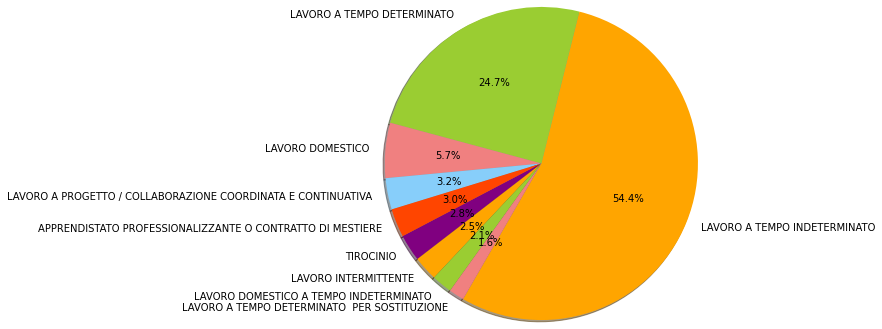

In [39]:
counts=cessatiCl.loc[:, ['CONTRATTO']].value_counts()
counts=counts[counts.values>30000]
cols = ['orange', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orangered', 'purple']
plt.pie(counts,labels=[i[0] for i in counts.index],autopct='%1.1f%%',colors=cols,startangle=240,shadow=True,radius=1.8)
plt.show()

Histplot (explanation): Plot univariate or bivariate histograms to show distributions of datasets. A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins.

Analisi della distribuzione (DENSITÀ)

Text(0.5, 1.0, 'Distribuzione contratti cessati negli anni')

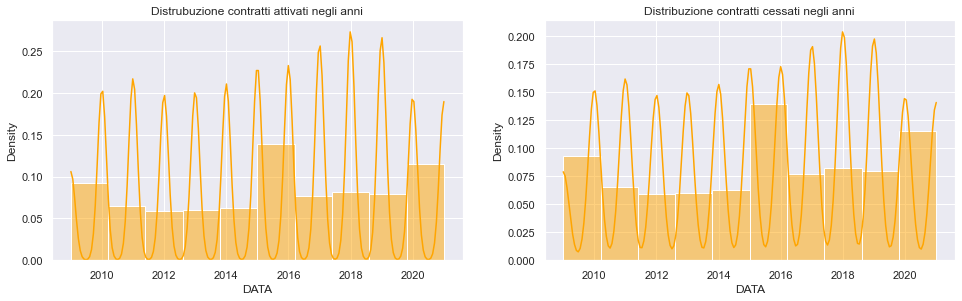

In [40]:
sns.set(rc={"figure.figsize":(25,15)})
plt.subplot(3,3,2)
sns.histplot(attivatiCl.DATA,label="DATA",stat="density",bins=10,kde=True, color="orange").set_title("Distrubuzione contratti attivati negli anni")
plt.subplot(3,3,3)
sns.histplot(cessatiCl.DATA,label="DATA",stat="density",bins=10,kde=True, color="orange").set_title("Distribuzione contratti cessati negli anni")

Considerazioni:

A seguito di un'analisi sul dataset, dopo una iniziale scrematura dei dati, si è potuto considerare come ci sia stato un incremento di contratti attivati a partire dall'anno 2009. Abbiamo dunque considerato l'era della digitalizzazione come intervallo di tempo cruciale su cui fare riferimento. In particolare, si è voluto avere un focus a partire dall'anno 2009 e fino al 2021. Da una analisi del numero di contratti attivati per settore, abbiamo potuto osservare come il SETTORE ALBERGHIERO sia quello con più contratti attivati, e quello più richiesto, seguito da RISTORAZIONE CON SOMMINISTRAZIONE e ATTIVITÀ DI PRODUZIONE CINEMATOGRAFICA, DI VIDEO E DI PROGRAMMI TELEVISIVI. In particolare, l'anno 2018 rappresenta quello con il maggior numero di contratti attivati.

Riguardo i contratti cessati, un dataset meno consistente di quello precedente, dopo le varie analisi spicca come le ATTIVITÀ NEL SETTORE DOMESTICO (nello specifico denominate come "attività di famiglie e convivenze come datori di lavoro per personale domestico") sia quella con più contratti cessati, dato coerente con lo sviluppo digitale che inquadra un allontanamento del personale domestico in favore di tecnologie che possano svolgere compiti richiesti. Il settore Alberghiero risulta quindi uno dei più richiesti, dal momento che è poco colpito dal punto di vista dei licenziamenti e dei contratti cessati, assieme al settore dei trasporti. Anche per quanto riguarda i contratti cessati, l'anno 2018 rappresenta quello con maggior numero di record, seguito poi da 2019 e 2017. Abbiamo altresì notato come i contratti di lavoro con tipologia a TEMPO INDETERMINATO siano quelli con un maggior numero di cessazioni, seguiti da quelli a TEMPO DETERMINATO.



In [41]:
attivatiCl.ETA.mean()

35.34094555467996

In [42]:
attivatiCl.ETA.std()

11.523471509928566

In [43]:
cessatiCl.ETA.mean()

38.00773828395627

In [44]:
cessatiCl.ETA.std()

12.283984378516445

In [45]:
attivatiCl.GENERE.value_counts()

M    4793508
F    4241612
Name: GENERE, dtype: int64

L'età media in cui si ha un aumento significativo perl'attivazione dei contratti è 35/36 anni, con una deviazione di circa 12 anni, mentre per i contratti cessati è 38 anni, con una deviazione di circa 12 anni. Questo significa che in media è più probabile che un contratto attivato a 35 anni duri circa 3/4 anni prima di essere cambiato.



In [46]:
cessatiCl.GENERE.value_counts()

M    1153427
F     890437
Name: GENERE, dtype: int64

Possiamo notare che i maschi tendono ad attivare e cessare contratti più frequentemente delle femmine, nonostante esse a livello di censimento siano più numerose dei maschi. Questo denota una tendenza a preferire un contratto stabile da parte delle femmine.